# **Machine Learning on Fertility Diagnosis**

Background:

100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits.

- Data Set Characteristics: Multivariate

- Number of Instances: 100

- Number of Attributes: 10

- Associated Tasks: Classification, Regression



**Attribute Information:**

- Season: winter, spring, summer, fall

- Age: 18-36

- Child diseases (ie , chicken pox, measles, mumps, polio): yes and no

- Accident or serious trauma: yes and no

- Surgical intervention: yes and no

- High fevers in the last year: less than three months ago, more than three months ago, no

- Frequency of alcohol consumption: several times a day, every day, several times a week, once a week, hardly ever or never

- Smoking: never, occasional, daily

- Number of hours spent sitting day

- Diagnosis: normal (N) and altered (O)

Dataset: https://archive.ics.uci.edu/dataset/244/fertility

In [3]:
# import relevant libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore")

## 1. Data Exploration 

In [4]:
# load the dataset
fertility_df = pd.read_csv("dataset/fertility.csv") 

# read the first five rows 
fertility_df.head()


,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In [5]:
# display the data info
fertility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-null    object
 6   Frequency of alcohol consumption       100 non-null    object
 7   Smoking habit                          100 non-null    object
 8   Number of hours spent sitting per day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


In [6]:
# check for missing values for each feature 
fertility_df.isnull().sum()

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64

In [7]:
# check for duplicated rows 
fertility_df.duplicated().sum()

np.int64(1)

In [8]:
# remove the duplicated rows 
fertility_df.drop_duplicates(inplace = True)

In [9]:
# re-check for duplicated rows
fertility_df.duplicated().sum()

np.int64(0)

In [10]:
# rename the columns 
fertility_df.rename(columns = {'Season': 'season', 
                               'Age': 'age', 
                               'Childish diseases': 'child_diseases', 
                               'Accident or serious trauma': 'accident', 
                               'Surgical intervention': 'surgical_intervention', 
                               'High fevers in the last year': 'high_fevers', 
                               'Frequency of alcohol consumption': 'alcohol', 
                               'Smoking habit': 'smoking', 
                               'Number of hours spent sitting per day': 'hrs_sitting', 
                               'Diagnosis': 'diagnosis'}, inplace = True)
fertility_df.head()

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


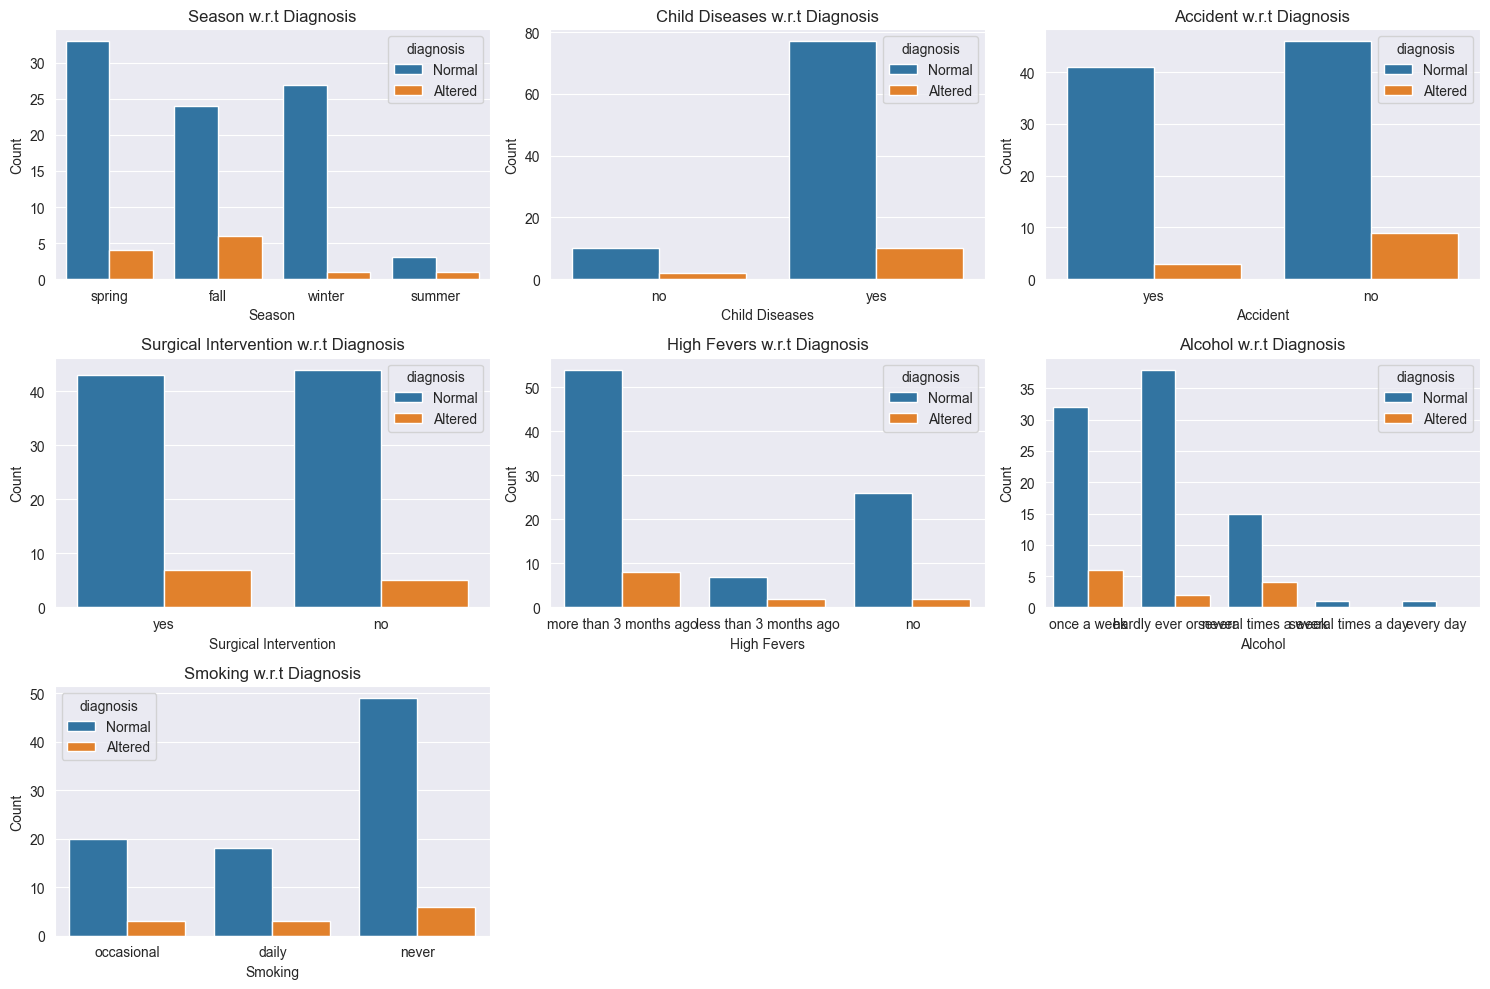

In [11]:
# visualize the categorical features with respect to diagnosis 

sns.set_style("darkgrid")
plt.figure(figsize = (15, 10))
plt.subplot(3, 3, 1)
sns.countplot(x = 'season', hue = 'diagnosis', data = fertility_df)
plt.title("Season w.r.t Diagnosis")
plt.xlabel("Season")
plt.ylabel("Count")

plt.subplot(3, 3, 2)
sns.countplot(x = 'child_diseases', hue = 'diagnosis', data = fertility_df)
plt.title("Child Diseases w.r.t Diagnosis")
plt.xlabel("Child Diseases")
plt.ylabel("Count")

plt.subplot(3, 3, 3)
sns.countplot(x = 'accident', hue = 'diagnosis', data = fertility_df)
plt.title("Accident w.r.t Diagnosis")
plt.xlabel("Accident")
plt.ylabel("Count")

plt.subplot(3, 3, 4)
sns.countplot(x = 'surgical_intervention', hue = 'diagnosis', data = fertility_df)
plt.title("Surgical Intervention w.r.t Diagnosis")
plt.xlabel("Surgical Intervention")
plt.ylabel("Count")

plt.subplot(3, 3, 5)
sns.countplot(x = 'high_fevers', hue = 'diagnosis', data = fertility_df)
plt.title("High Fevers w.r.t Diagnosis")
plt.xlabel("High Fevers")
plt.ylabel("Count")

plt.subplot(3, 3, 6)
sns.countplot(x = 'alcohol', hue = 'diagnosis', data = fertility_df)
plt.title("Alcohol w.r.t Diagnosis")
plt.xlabel("Alcohol")
plt.ylabel("Count")

plt.subplot(3, 3, 7)
sns.countplot(x = 'smoking', hue = 'diagnosis', data = fertility_df)
plt.title("Smoking w.r.t Diagnosis")
plt.xlabel("Smoking")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

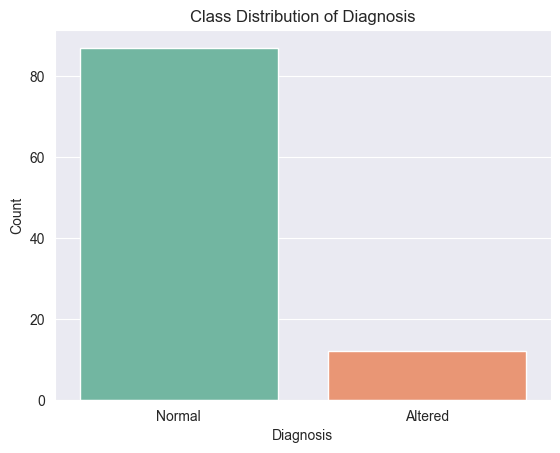

In [12]:
# visualize the class distribution of diagnosis 
sns.countplot(x = 'diagnosis', hue = 'diagnosis', data = fertility_df, palette = "Set2")
plt.title("Class Distribution of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

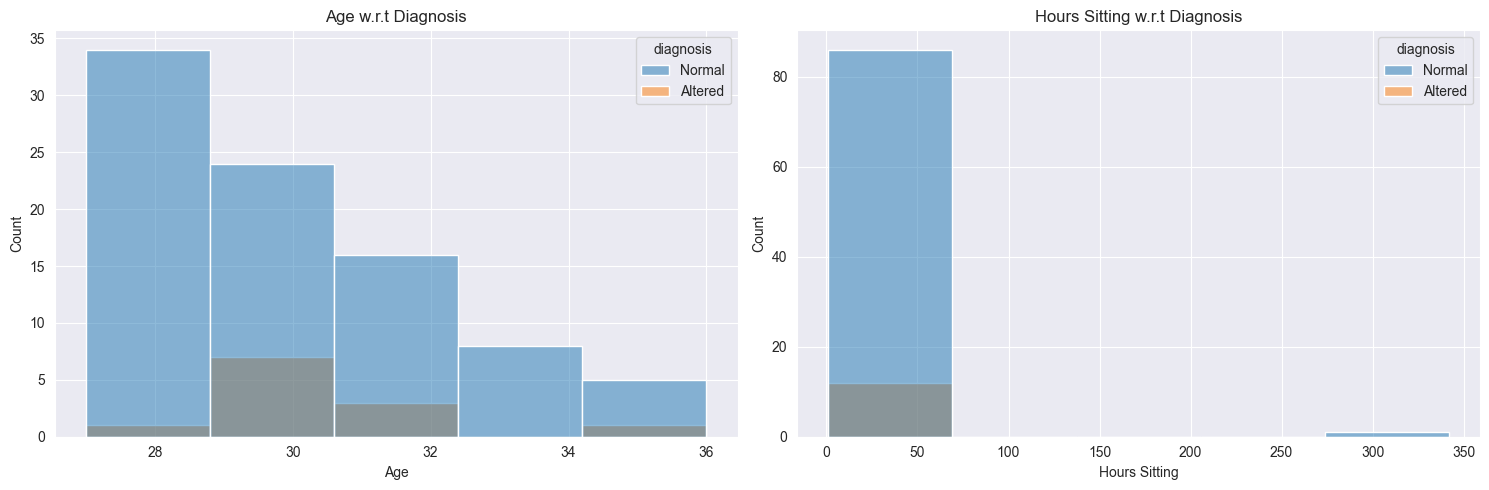

In [13]:
# visualize the numerical features with respect to diagnosis
plt.figure(figsize = (15, 5))
sns.set_style("darkgrid")
plt.subplot(1, 2, 1)
sns.histplot(x = "age", hue = "diagnosis", data = fertility_df, bins = 5)
plt.title("Age w.r.t Diagnosis")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(x = "hrs_sitting", hue = "diagnosis", data = fertility_df, bins = 5)
plt.title("Hours Sitting w.r.t Diagnosis")
plt.xlabel("Hours Sitting")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

## 2. Feature Selection using Decision Trees 

In [14]:
# extract the column names
X_col = fertility_df.drop(['diagnosis'], axis = 1).columns

In [15]:
# split the data into X and y 
X_dtc = fertility_df[X_col]
y_dtc = fertility_df['diagnosis']

In [16]:
# encode the categorical features 
X_dtc['season'] = X_dtc['season'].map({'fall': 0, 'summer': 1, 'spring': 2, 'winter': 3})
X_dtc['child_diseases'] = X_dtc['child_diseases'].map({'no': 0, 'yes': 1})
X_dtc['accident'] = X_dtc['accident'].map({'no': 0, 'yes': 1})
X_dtc['surgical_intervention'] = X_dtc['surgical_intervention'].map({'no': 0, 'yes': 1})
X_dtc['high_fevers'] = X_dtc['high_fevers'].map({'less than 3 months ago': 0, 'more than 3 months ago': 1, 'no': 2})
X_dtc['alcohol'] = X_dtc['alcohol'].map({'every day': 0, 'hardly ever or never': 1, 'once a week': 2, 'several times a day': 3, 'several times a week': 4})
X_dtc['smoking'] = X_dtc['smoking'].map({'daily': 0, 'never': 1, 'occasional': 2})

In [17]:
X_dtc.isnull().sum()

season                   0
age                      0
child_diseases           0
accident                 0
surgical_intervention    0
high_fevers              0
alcohol                  0
smoking                  0
hrs_sitting              0
dtype: int64

In [18]:
# build decision trees classifier
dtc = DecisionTreeClassifier(random_state = 2025)
dtc.fit(X_dtc, y_dtc)

DecisionTreeClassifier(random_state=2025)

In [19]:
# extract the feature importances
dtc_fi = dtc.feature_importances_

# store into dataframe 
dtc_fi_dict = {'feature': X_col, 
               'feature_importance': dtc_fi}
dtc_fi_df = pd.DataFrame(dtc_fi_dict)

dtc_fi_df_sorted = dtc_fi_df.sort_values(by = ["feature_importance"], ascending = False)

dtc_fi_df_sorted

,feature,feature_importance
5,high_fevers,0.160060
8,hrs_sitting,0.149130
6,alcohol,0.142779
0,season,0.132730
1,age,0.114941
3,accident,0.103754
4,surgical_intervention,0.088763
2,child_diseases,0.066365
7,smoking,0.041478


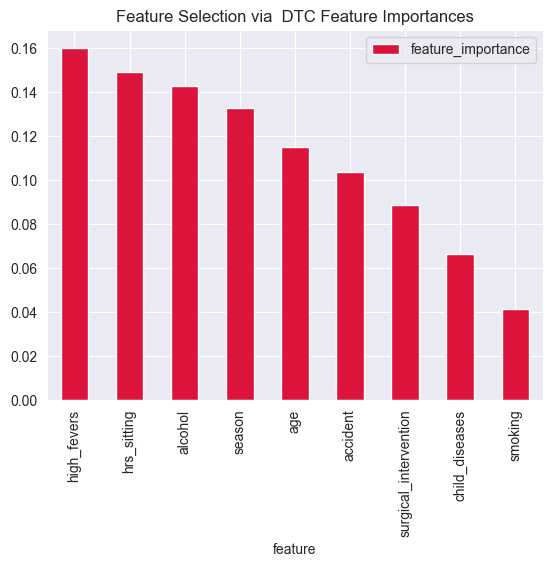

In [20]:
# plot the feature importances
dtc_fi_df_sorted.plot(x = "feature", y = "feature_importance", kind = "bar", color = "crimson")
plt.title("Feature Selection via  DTC Feature Importances")
plt.show()


## 3. Resampling of Class Distribution using SMOTETomek

In [21]:
# encode the categorical features on training set
fertility_df['season'] = fertility_df['season'].map({'fall': 0, 'summer': 1, 'spring': 2, 'winter': 3})
fertility_df['child_diseases'] = fertility_df['child_diseases'].map({'no': 0, 'yes': 1})
fertility_df['accident'] = fertility_df['accident'].map({'no': 0, 'yes': 1})
fertility_df['surgical_intervention'] = fertility_df['surgical_intervention'].map({'no': 0, 'yes': 1})
fertility_df['high_fevers'] = fertility_df['high_fevers'].map({'less than 3 months ago': 0, 'more than 3 months ago': 1, 'no': 2})
fertility_df['alcohol'] = fertility_df['alcohol'].map({'every day': 0, 'hardly ever or never': 1, 'once a week': 2, 'several times a day': 3, 'several times a week': 4})
fertility_df['smoking'] = fertility_df['smoking'].map({'daily': 0, 'never': 1, 'occasional': 2})
fertility_df.head()

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,2,30,0,1,1,1,2,2,16,Normal
1,2,35,1,0,1,1,2,0,6,Altered
2,2,27,1,0,0,1,1,1,9,Normal
3,2,32,0,1,1,1,1,1,7,Normal
4,2,30,1,1,0,1,2,1,9,Altered


In [22]:
# check the distribution of diagnosis before applying resampling technique
fertility_df['diagnosis'].value_counts()

diagnosis
Normal     87
Altered    12
Name: count, dtype: int64

In [23]:
# apply resampling technique
smt = SMOTETomek(random_state = 2025)
X_res, y_res = smt.fit_resample(fertility_df[X_col], fertility_df['diagnosis'])


In [24]:
# check the distribution of diagnosis after applying resampling technique
y_res.value_counts()

diagnosis
Normal     87
Altered    87
Name: count, dtype: int64

## 4. Data Splitting and Data Standardization

In [25]:
# split the data into 80% training and 20% testing 
X_train, X_test, y_train, y_test = train_test_split(X_res, 
                                                    y_res, 
                                                    test_size = 0.20, 
                                                    shuffle = True, 
                                                    random_state = 2025, 
                                                    stratify = y_res)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(139, 9)
(35, 9)
(139,)
(35,)


In [26]:
# standardize the numerical features
scaler = StandardScaler()
X_train[['age', 'hrs_sitting']] = scaler.fit_transform(X_train[['age', 'hrs_sitting']])
X_test[['age', 'hrs_sitting']] = scaler.transform(X_test[['age', 'hrs_sitting']])
X_train.head()

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
78,3,3.121823,1,0,1,2,4,2,-0.822777
25,0,-0.076703,1,0,1,1,4,1,-0.146055
98,3,-0.076703,0,1,1,1,4,1,-1.499498
116,0,-0.076703,1,0,1,0,2,1,-0.146055
66,2,-1.675966,1,0,0,2,1,1,0.192306


## 5. Fine Tuning and Evaluation of ML Models 

In [27]:
# set the cross-validation 
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2025)

### (A) Random Forest Classifier

In [28]:
# set the params
rfc_params = {'n_estimators': [50, 60, 70, 80, 90, 100], 
              'max_depth': [None, 5, 6, 7, 8, 9, 10], 
              'min_samples_split': [2, 3, 4, 5], 
              'min_samples_leaf': [2, 3, 4, 5]}

# set the grid search params
rfc_gs = GridSearchCV(estimator = RandomForestClassifier(random_state = 2025),
                      param_grid = rfc_params, 
                      scoring = "accuracy", 
                      refit = True, 
                      verbose = 3, 
                      cv = cv, 
                      return_train_score = True, 
                      n_jobs = 1)
# fit the grid search 
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
[CV 1/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.955, test=0.893) total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.919, test=0.857) total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.946, test=0.929) total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.964, test=0.929) total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.964, test=0.852) total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=(train=0.955, test=0.893) total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=(train=0

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=RandomForestClassifier(random_state=2025), n_jobs=1,
             param_grid={'max_depth': [None, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [29]:
# display the best score and hyperparameters
print("Best Score: {:.4f}".format(rfc_gs.best_score_))
print("Best hyperparameters: {}".format(rfc_gs.best_params_))

Best Score: 0.8989
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [38]:
# perform prediction
y_pred_rfc = rfc_gs.predict(X_test)
y_pred_prob_rfc = rfc_gs.predict_proba(X_test)[:, 1]

In [31]:
# display the classification report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

     Altered       0.80      0.89      0.84        18
      Normal       0.87      0.76      0.81        17

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



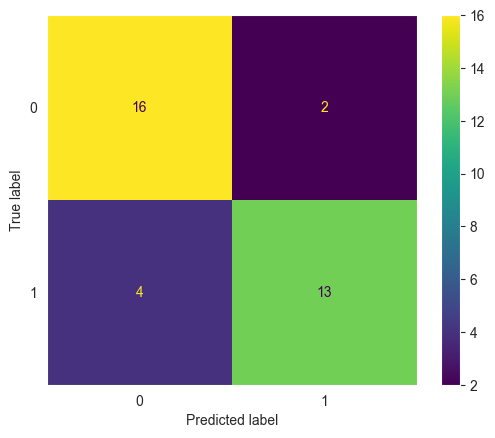

In [32]:
# display the confusion matrix 
cm = confusion_matrix(y_test, y_pred_rfc)

cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()
plt.grid(False)
plt.show()

In [74]:
# calculate the fpr, tpr, thresholds
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, y_pred_prob_rfc, pos_label='Normal')

In [75]:
# calculate the roc score
rfc_auc = roc_auc_score(y_test, y_pred_prob_rfc)

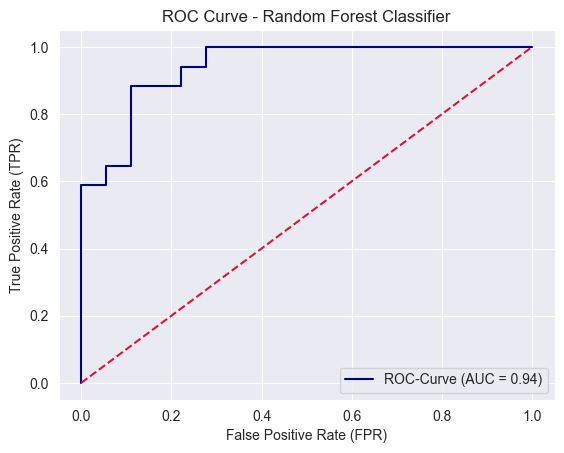

In [76]:
# plot the roc curve 
plt.plot(rfc_fpr, rfc_tpr, color = "navy", label = "ROC-Curve (AUC = {:.2f})".format(rfc_auc))
plt.plot([0, 1], [0, 1], linestyle = '--', color = "crimson")
plt.title("ROC Curve - Random Forest Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()


### (B) Gradient Boosting Classifier

In [50]:
# set the params
gbc_params = {'n_estimators': [50, 60, 70, 80, 90, 100], 
              'max_depth': [None, 5, 6, 7, 8, 9, 10], 
              'min_samples_split': [2, 3, 4, 5], 
              'min_samples_leaf': [2, 3, 4, 5]}

# set the grid search params
gbc_gs = GridSearchCV(estimator = GradientBoostingClassifier(random_state = 2025),
                      param_grid = gbc_params, 
                      scoring = "accuracy", 
                      refit = True, 
                      verbose = 3, 
                      cv = cv, 
                      return_train_score = True, 
                      n_jobs = 1)
# fit the grid search 
gbc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
[CV 1/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.991, test=0.893) total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=1.000, test=0.821) total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.991, test=0.893) total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.991, test=0.893) total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=1.000, test=0.815) total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=(train=0.991, test=0.893) total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=(train=1

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=2025), n_jobs=1,
             param_grid={'max_depth': [None, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [51]:
# display the best score and hyperparameters
print("Best Score: {:.4f}".format(gbc_gs.best_score_))
print("Best hyperparameters: {}".format(gbc_gs.best_params_))

Best Score: 0.8992
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [59]:
# perform prediction
y_pred_gbc = gbc_gs.predict(X_test)
y_pred_prob_gbc = gbc_gs.predict_proba(X_test)[:, 1]

In [60]:
# display the classification report
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

     Altered       0.80      0.89      0.84        18
      Normal       0.87      0.76      0.81        17

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



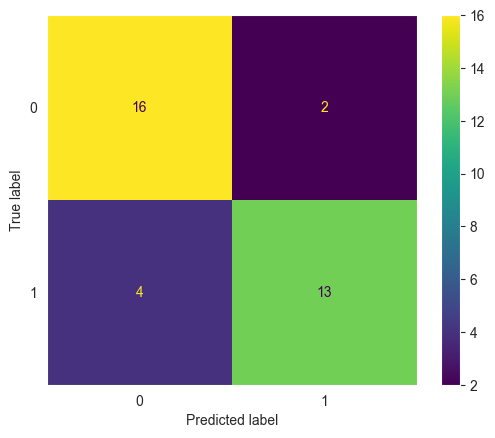

In [61]:
# display the confusion matrix 
cm = confusion_matrix(y_test, y_pred_gbc)

cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()
plt.grid(False)
plt.show()

In [62]:
# calculate the fpr, tpr, thresholds
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, y_pred_prob_gbc, pos_label='Normal')

In [64]:
# calculate the roc score
gbc_auc = roc_auc_score(y_test, y_pred_prob_gbc)

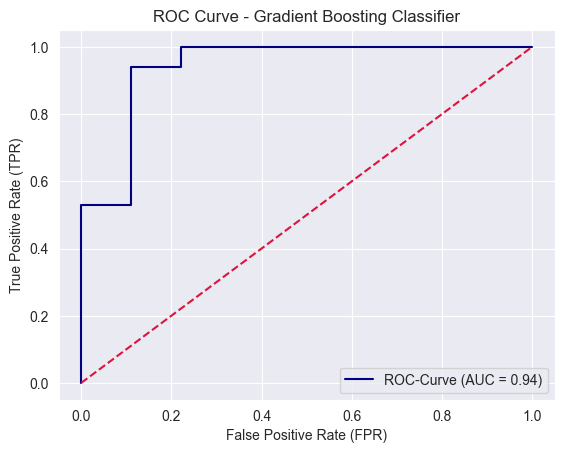

In [65]:
# plot the roc curve 
plt.plot(gbc_fpr, gbc_tpr, color = "navy", label = "ROC-Curve (AUC = {:.2f})".format(gbc_auc))
plt.plot([0, 1], [0, 1], linestyle = '--', color = "crimson")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()


### (C) Extra Trees Classifier

In [66]:
# set the params
etc_params = {'n_estimators': [50, 60, 70, 80, 90, 100], 
              'max_depth': [None, 5, 6, 7, 8, 9, 10], 
              'min_samples_split': [2, 3, 4, 5], 
              'min_samples_leaf': [2, 3, 4, 5]}

# set the grid search params
etc_gs = GridSearchCV(estimator = ExtraTreesClassifier(random_state = 2025),
                      param_grid = etc_params, 
                      scoring = "accuracy", 
                      refit = True, 
                      verbose = 3, 
                      cv = cv, 
                      return_train_score = True, 
                      n_jobs = 1)
# fit the grid search 
etc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
[CV 1/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.982, test=0.821) total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.964, test=0.929) total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.955, test=0.929) total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.964, test=0.893) total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.973, test=0.815) total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=(train=0.982, test=0.786) total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=(train=0

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=ExtraTreesClassifier(random_state=2025), n_jobs=1,
             param_grid={'max_depth': [None, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [67]:
# display the best score and hyperparameters
print("Best Score: {:.4f}".format(etc_gs.best_score_))
print("Best hyperparameters: {}".format(etc_gs.best_params_))

Best Score: 0.8987
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [68]:
# perform prediction
y_pred_etc = etc_gs.predict(X_test)
y_pred_prob_etc = etc_gs.predict_proba(X_test)[:, 1]

In [69]:
# display the classification report
print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

     Altered       0.89      0.94      0.92        18
      Normal       0.94      0.88      0.91        17

    accuracy                           0.91        35
   macro avg       0.92      0.91      0.91        35
weighted avg       0.92      0.91      0.91        35



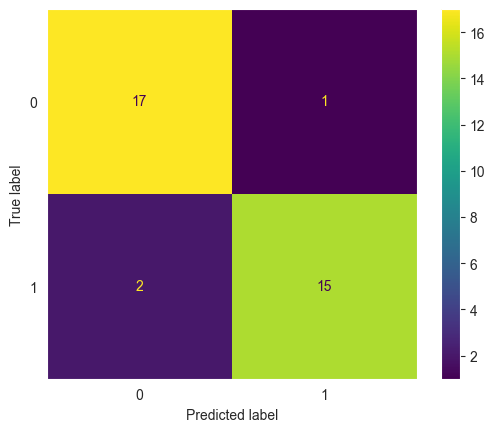

In [70]:
# display the confusion matrix 
cm = confusion_matrix(y_test, y_pred_etc)

cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()
plt.grid(False)
plt.show()

In [71]:
# calculate the fpr, tpr, thresholds
etc_fpr, etc_tpr, etc_thresholds = roc_curve(y_test, y_pred_prob_etc, pos_label='Normal')

In [72]:
# calculate the roc score
etc_auc = roc_auc_score(y_test, y_pred_prob_etc)

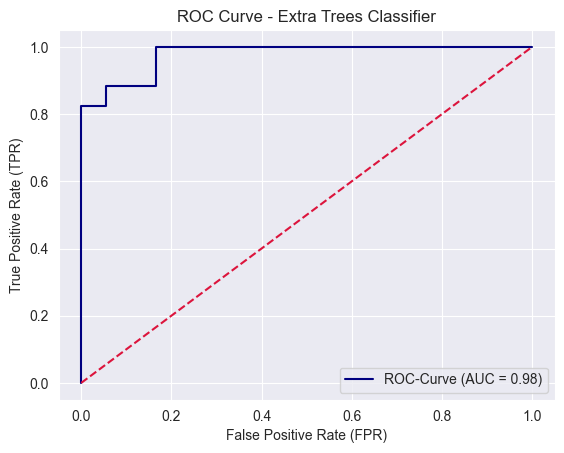

In [73]:
# plot the roc curve 
plt.plot(etc_fpr, etc_tpr, color = "navy", label = "ROC-Curve (AUC = {:.2f})".format(etc_auc))
plt.plot([0, 1], [0, 1], linestyle = '--', color = "crimson")
plt.title("ROC Curve - Extra Trees Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()
